In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 96% 783M/812M [00:03<00:00, 169MB/s]
100% 812M/812M [00:03<00:00, 260MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compresed file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [ ]:
# extracting the compresed file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [ ]:
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images:',file_count)


number of images: 25000


In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.9291.jpg', 'cat.803.jpg', 'dog.11916.jpg', 'dog.10296.jpg', 'dog.9817.jpg', 'dog.1165.jpg', 'cat.2957.jpg', 'dog.2228.jpg', 'dog.9718.jpg', 'dog.3255.jpg', 'cat.7463.jpg', 'cat.3949.jpg', 'cat.12214.jpg', 'dog.9645.jpg', 'dog.11647.jpg', 'cat.9627.jpg', 'dog.1759.jpg', 'cat.8058.jpg', 'cat.5578.jpg', 'cat.2700.jpg', 'cat.4056.jpg', 'dog.1119.jpg', 'cat.4926.jpg', 'cat.2192.jpg', 'dog.519.jpg', 'dog.818.jpg', 'cat.7719.jpg', 'dog.2264.jpg', 'cat.2333.jpg', 'cat.12292.jpg', 'cat.2721.jpg', 'cat.4360.jpg', 'dog.1135.jpg', 'dog.3226.jpg', 'dog.5003.jpg', 'cat.11183.jpg', 'dog.740.jpg', 'dog.4473.jpg', 'cat.7114.jpg', 'dog.2058.jpg', 'dog.1768.jpg', 'cat.2667.jpg', 'dog.5418.jpg', 'cat.6015.jpg', 'cat.7438.jpg', 'dog.9062.jpg', 'dog.6334.jpg', 'cat.7195.jpg', 'dog.9029.jpg', 'cat.12411.jpg', 'cat.1125.jpg', 'dog.10103.jpg', 'cat.11257.jpg', 'cat.2654.jpg', 'cat.8812.jpg', 'cat.7045.jpg', 'cat.7293.jpg', 'cat.4479.jpg', 'cat.6525.jpg', 'cat.126.jpg', 'cat.10024.jpg', 'dog.996.jpg', 'do

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

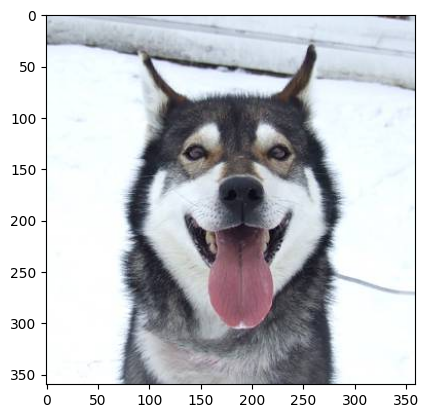

In [ ]:
img = mpimg.imread('/content/train/dog.12326.jpg')
imgplt = plt.imshow(img)
plt.show()

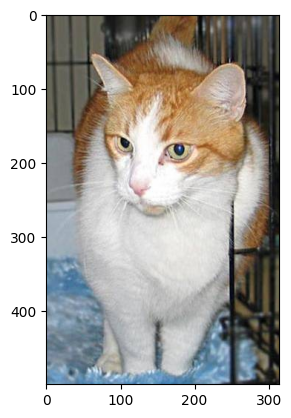

In [ ]:
img = mpimg.imread('/content/train/cat.3476.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
#resizing all the images
file_names  = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
dog


In [ ]:
file_names  = os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_names:

  name=img_file[0:3]

  if name=="dog":
    dog_count+=1

  else:
    cat_count+=1

print("number of dog images=",dog_count)
print("number of cat images=",cat_count)

number of dog images= 12500
number of cat images= 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

In [ ]:
img = mpimg.imread('/content/image resized/dog.12326.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('/content/image resized/cat.3476.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
#create a forloop to assign labels
filenames  = os.listdir('/content/image resized/')

labels=[]

for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.9291.jpg', 'cat.803.jpg', 'dog.11916.jpg', 'dog.10296.jpg', 'dog.9817.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
2000


In [ ]:
#counting the images of dogs anf cats
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1004  996]


In [ ]:
#converting all the resized images to numpy arrays
import cv2
import glob

In [ ]:
image_directory='/content/image resized/'
image_extension=['jpg']

files=[]

[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 68  61  64]
   [ 65  58  61]
   [ 62  55  58]
   ...
   [135 154 161]
   [138 151 159]
   [150 161 169]]

  [[ 67  60  63]
   [ 63  56  59]
   [ 58  51  54]
   ...
   [136 155 162]
   [139 152 160]
   [152 163 171]]

  [[ 67  60  63]
   [ 61  54  57]
   [ 56  49  52]
   ...
   [137 156 161]
   [145 157 163]
   [159 169 176]]

  ...

  [[ 94 140 217]
   [ 96 143 217]
   [ 99 146 220]
   ...
   [109 149 201]
   [115 155 207]
   [105 145 197]]

  [[ 94 140 217]
   [ 97 144 218]
   [ 99 146 220]
   ...
   [ 99 141 194]
   [107 149 202]
   [106 148 201]]

  [[ 93 139 216]
   [ 97 144 218]
   [ 99 146 220]
   ...
   [ 90 132 185]
   [ 99 141 194]
   [104 146 199]]]


 [[[  8  22  21]
   [ 13  27  26]
   [ 20  32  36]
   ...
   [ 45  50  48]
   [ 43  48  46]
   [ 43  48  46]]

  [[  8  22  21]
   [ 13  27  26]
   [ 20  32  36]
   ...
   [ 45  50  48]
   [ 43  48  46]
   [ 43  48  46]]

  [[  7  21  20]
   [ 13  27  26]
   [ 19  31  35]
   ...
   [ 45  50  48]
   [ 43  48  46]
   [ 43  48

In [ ]:
typep

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
x=dog_cat_images
y=np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
#scaling the data
x_train_scaled=x_train/255

x_test_scaled=x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.03921569 0.09803922 0.16078431]
   [0.03529412 0.09411765 0.15686275]
   [0.04313725 0.08627451 0.14117647]
   ...
   [0.05882353 0.0627451  0.05490196]
   [0.0627451  0.06666667 0.05882353]
   [0.0627451  0.06666667 0.05882353]]

  [[0.02352941 0.08235294 0.14509804]
   [0.02745098 0.07843137 0.14117647]
   [0.03529412 0.07843137 0.13333333]
   ...
   [0.0627451  0.06666667 0.05882353]
   [0.06666667 0.07058824 0.0627451 ]
   [0.07058824 0.0745098  0.06666667]]

  [[0.01960784 0.07058824 0.1254902 ]
   [0.01960784 0.07058824 0.1254902 ]
   [0.02745098 0.07058824 0.1254902 ]
   ...
   [0.07058824 0.0745098  0.06666667]
   [0.07843137 0.08235294 0.0745098 ]
   [0.07843137 0.08235294 0.0745098 ]]

  ...

  [[0.10196078 0.14117647 0.18039216]
   [0.09803922 0.14117647 0.17254902]
   [0.10588235 0.1372549  0.16470588]
   ...
   [0.09803922 0.12156863 0.11764706]
   [0.10980392 0.11764706 0.11764706]
   [0.10980392 0.11764706 0.11764706]]

  [[0.07843137 0.12941176 0.16078431]
   [0.0

In [ ]:
#building the neural network
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer (mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes=2

model=tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']

)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 13s 45ms/step - loss: 0.1848 - acc: 0.9231
Epoch 2/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0645 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0476 - acc: 0.9906
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0404 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0312 - acc: 0.9944


In [ ]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

13/13 [==============================] - 2s 75ms/step - loss: 0.0967 - acc: 0.9725
Test Loss= 0.09666618704795837
Test Accuracy= 0.9725000262260437


Path of the image to be predicted: /content/human.jpg


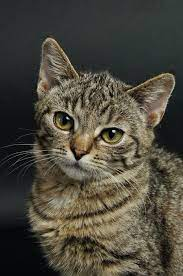

1/1 [==============================] - 0s 23ms/step
[[ 3.9572098 -3.0586123]]
[[ 3.9572098 -3.0586123]]
the image represents a Cat


In [ ]:
input_image_path=input('Path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize=cv2.resize(input_image,(224,224))

input_image_scaled=input_image_resize/225

image_reshaped=np.reshape(input_image_scaled, [1,224,224,3])

input_prediction=model.predict(image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_prediction)

if input_pred_label==0:
  print('the image represents a Cat')

elif input_pred_label==1:
  print('the image represents a Dog')

else:
  print('the image represents other animals')
